In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Get a list of column names and types
    
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ca1e660f70>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

<AxesSubplot:xlabel='date'>

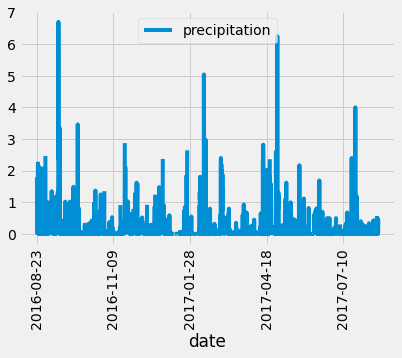

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the last date in data set.
past_year = dt.date(2017,8,23)-dt.timedelta(days=365)

past_year
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=past_year).all()
date_precipitation


# Save the query results as a Pandas DataFrame and set the index to the date column
date_prep = pd.DataFrame(date_precipitation, columns=['date','precipitation'])
# date_prep = pd.DataFrame(date_precipitation)
# date_prep.columns = ['date','precipitation']
date_prep.head()

# Sort the dataframe by date

date_prep_sort = date_prep.sort_values('date')
date_prep_sort

# Use Pandas Plotting with Matplotlib to plot the data


date_prep_sort.plot(x="date", y="precipitation", rot=90)



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prep_sort.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)). \
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)). \
                        filter(Measurement.station == "USC00519281").all()

round(results[0][2],2)

71.66

Text(0.5, -1.340000000000014, 'Temprature')

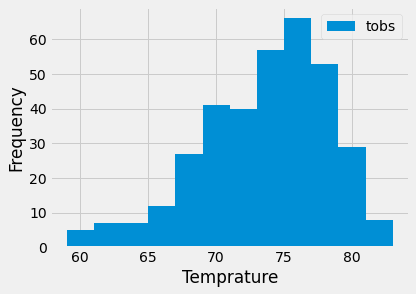

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
            filter(Measurement.date >= past_year). \
            filter(Measurement.station == "USC00519281").all()
df = pd.DataFrame(results, columns=["tobs"])

df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temprature")

# Close session

In [17]:
# Close Session
session.close()